rectangle no.  0 relatively changed by  0.0114 
rectangle no.  3 relatively changed by  0.0064 
rectangle no.  2 relatively changed by  0.0045 
rectangle no.  5 relatively changed by  0.0045 
rectangle no.  9 relatively changed by  0.0043 
rectangle no. 19 relatively changed by  0.0042 
rectangle no. 42 relatively changed by  0.0032 
rectangle no.  4 relatively changed by  0.0021 
rectangle no. 31 relatively changed by  0.0020 
rectangle no.  8 relatively changed by  0.0018 
rectangle no. 60 relatively changed by  0.0017 
rectangle no. 54 relatively changed by  0.0017 


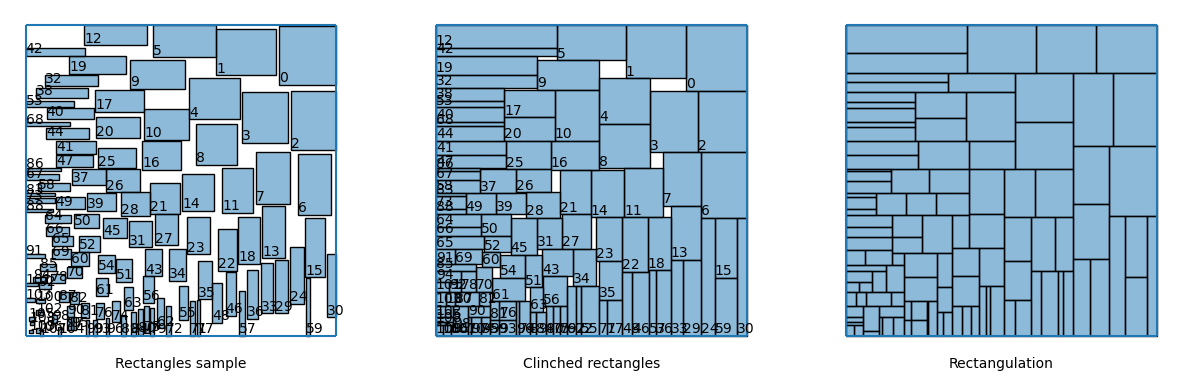

In [10]:
import numpy as np
from SquareDivision.src.rectangle_class import Rectangulation
from SquareDivision.src.distributions import FromFunction, BetweenFunctions, tepui, surface_perp_to

rects = Rectangulation(config={"seed": 123567})


width_0 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([0, -1, 5]), val_at_0 = 0.005)
width_1 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([0, -2, 10]), val_at_0 = 0.01)
# width_1 = lambda mid_pt: tepui(mid_pt, top=0.6, bottom=0.01, slope=2, vertex=0.8, pts=np.array([[0.5, 0.5]]))

height_0 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([-1, 0, 5]), val_at_0 = 0.005)
height_1 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([-2, 0, 10]), val_at_0 = 0.01)
# height_1 = lambda mid_pt: tepui(mid_pt, top=0.6, bottom=0.01, slope=2, vertex=0.6, pts=np.array([[0.5, 0.5]]))


rects.execute(
    num=1500, 
    widths_strategy = BetweenFunctions(func_0=width_0, func_1=width_1, rng=rects.rng), 
    heights_strategy= BetweenFunctions(func_0=height_0, func_1=height_1, rng=rects.rng), 
)
rects.prepare_closing()
rects.close_holes()

rects.report(tol=0.0015, digits=4, limit_list=20)
rects.draw(disjoint=True, inflated=True, inflated_nums=True, closed=True, closed_nums=False)

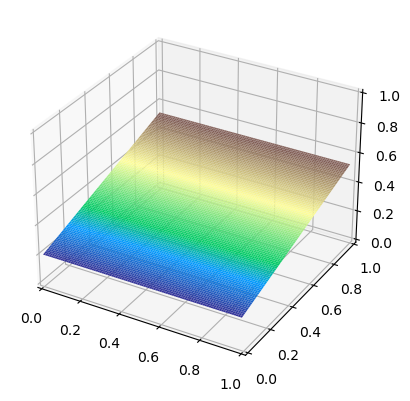

In [11]:
import numpy as np
from SquareDivision.src.distributions import surface_perp_to
from SquareDivision.draw.draw import draw_func
surface_perp_to_kwargs = {'vect' : np.array([0, -1, 3]), 'val_at_0' : 0.2}
draw_func(surface_perp_to, func_kwargs = surface_perp_to_kwargs )

### graph f : (0, 1)^2 -> R

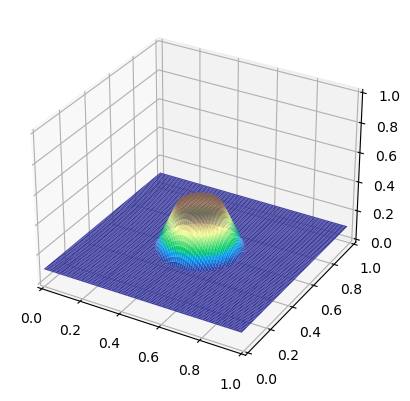

In [45]:
from functools import partial
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from SquareDivision.src.distributions import tepui

x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

X, Y = np.meshgrid(x, y)
points = np.array([X,Y])

func = partial(tepui, 
    top=0.4, 
    bottom=0.1, 
    slope=3, 
    vertex=0.7, 
    pts=np.array(
        [[0.5, 0.5]]
        ) 
)
Z = np.apply_along_axis(func, 0, points)

fig, ax =  plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlim3d(left=0, right=1)
ax.set_ylim3d(bottom=0, top=1)
ax.set_zlim3d(bottom=0, top=1)
ax.plot_surface(X, Y, Z, 
                vmin=Z.min(), 
                vmax=Z.max() + 0.1,
                rstride=1, cstride=1,
                cmap=cm.terrain
                )
plt.show()

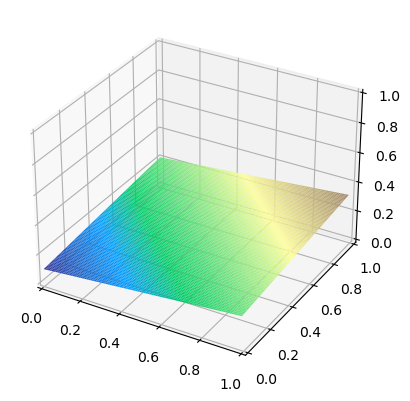

In [9]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from SquareDivision.src.distributions import surface_perp_to

x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

X, Y = np.meshgrid(x, y)
points = np.array([X,Y])

func = partial(surface_perp_to,
    vect = np.array([-1, -1, 9]),
    val_at_0 = 0.1
)
Z = np.apply_along_axis(func, 0, points)

fig, ax =  plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlim3d(left=0, right=1)
ax.set_ylim3d(bottom=0, top=1)
ax.set_zlim3d(bottom=0, top=1)
ax.plot_surface(X, Y, Z, 
                vmin=Z.min(), 
                vmax=Z.max() + 0.1,
                rstride=1, cstride=1,
                cmap=cm.terrain
                )
plt.show()


In [62]:
a,b,c = np.array([0,1,2])
c

2

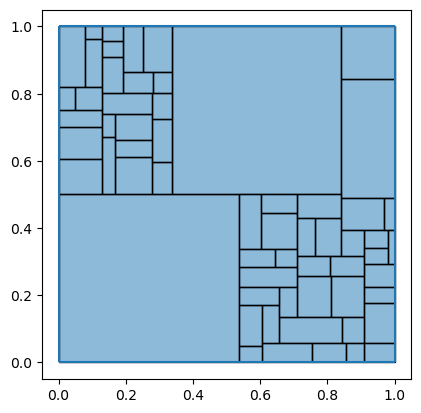

In [50]:
import matplotlib.pyplot as plt
from SquareDivision.draw.draw import draw_rectangles, rectangle_numbers
lin_sol = (rects.x0 + (rects.constraint.A.T).dot(l)).reshape(-1,4)
fig, ax = plt.subplots()
ax = draw_rectangles(ax, lin_sol)

In [46]:
import numpy as np
from SquareDivision.src.distributions import RngDistribution, SizeDistribution, linear_on_position
rects.sample_centers(RngDistribution(), rng=rects.rng, distribution='uniform', low=[0, 0], high=[1, 1], size=(5, 2))
rects.sample_widths(
    startegy=SizeDistribution(), 
    centers=rects.centers, 
    size_distribution=lambda arg : linear_on_position(arg, a=np.array([0.25, 0.0]), b=0.05))
rects.sample_heights(
    startegy=SizeDistribution(), 
    centers=rects.centers,
    size_distribution=lambda arg : linear_on_position(arg, a=np.array([0.0, 0.25]), b=0.05))

In [47]:
arr = np.c_[rects.centers, rects.widths, rects.heights]
print(arr)
print(f'centers:\n{rects.centers}')
print(f'widths:\n{rects.widths}')
print(f'heights:\n{rects.heights}')

[[0.40891237 0.02703582 0.15222809 0.05675896]
 [0.55605341 0.44201073 0.18901335 0.16050268]
 [0.30774572 0.6887314  0.12693643 0.22218285]
 [0.50895497 0.13692818 0.17723874 0.08423205]
 [0.94315182 0.98129848 0.28578795 0.29532462]]
centers:
[[0.40891237 0.02703582]
 [0.55605341 0.44201073]
 [0.30774572 0.6887314 ]
 [0.50895497 0.13692818]
 [0.94315182 0.98129848]]
widths:
[0.15222809 0.18901335 0.12693643 0.17723874 0.28578795]
heights:
[0.05675896 0.16050268 0.22218285 0.08423205 0.29532462]


In [4]:
from SquareDivision.src.distributions import tepui_distribution
print(rects.centers)
tepui_distribution(rects.centers, pts=np.array(
            [[0.25, 0.25],
             [0.75, 0.75],]
             )
    )

[[0.73892551 0.64887878]
 [0.38057859 0.0023377 ]
 [0.58649654 0.75154463]]


array([0.3 , 0.05, 0.3 ])

In [5]:
rects.sample_heights(
    startegy=SizeDistribution(), 
    centers=rects.centers,
    size_distribution=tepui_distribution)

In [6]:
print(f'heights:\n{rects.heights}')

heights:
[0.3  0.05 0.3 ]


#### Maybe x0 from the graph ?

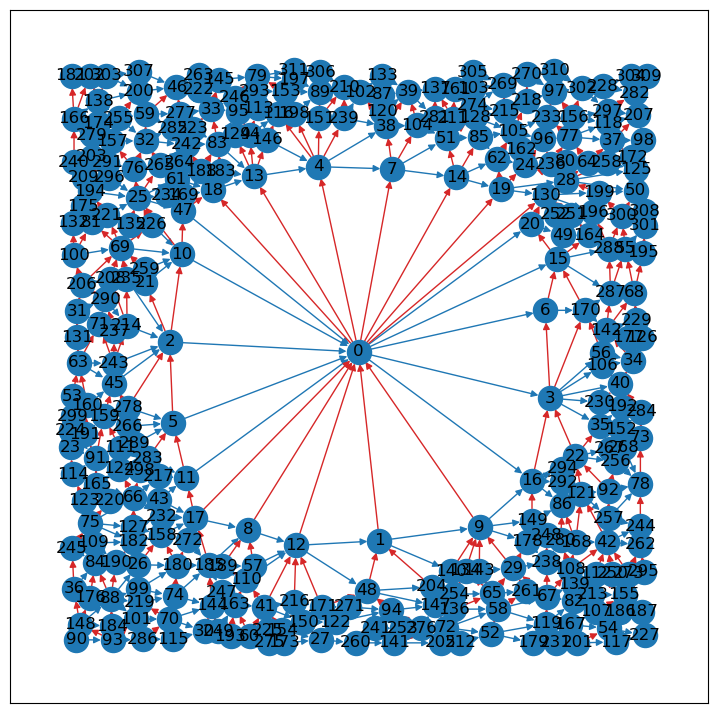

In [5]:
rects.graph_processing(rects.closed)
import networkx as nx
import matplotlib.pyplot as plt
H = nx.from_numpy_array(rects.east_neighbours, create_using=nx.DiGraph)# + rects.north_neighbours)
V = nx.from_numpy_array(rects.north_neighbours, create_using=nx.DiGraph)# + rects.north_neighbours)
attrs = { i : {'pos': tuple(row[:2] + 0.5 * row[2:4])} for i, row in enumerate(rects.clinched_rectangles)}
nx.set_node_attributes(H, attrs)
pos = nx.get_node_attributes(H,'pos')
fig, ax = plt.subplots(figsize=(9, 9))
nx.draw_networkx(H, pos=pos, ax=ax,  edge_color='tab:blue' )
nx.draw_networkx_edges(V, pos=pos, ax=ax, edge_color='tab:red')
plt.show()

In [73]:
import numpy as np
a = np.arange(80)
a = a.reshape(-1,4)
a[[5,3,7,0]] = np.arange(16).reshape(-1,4)


array([[12, 13, 14, 15],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [16, 17, 18, 19],
       [ 0,  1,  2,  3],
       [24, 25, 26, 27],
       [ 8,  9, 10, 11],
       [32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55],
       [56, 57, 58, 59],
       [60, 61, 62, 63],
       [64, 65, 66, 67],
       [68, 69, 70, 71],
       [72, 73, 74, 75],
       [76, 77, 78, 79]])

In [11]:
rhs_test= (
    [ 
        [0,1,2],
        'bidon',
        'mniam',
        (2,'43'),
        ['fr'],
        ['oo',32],
    ] 
    + [0,['foo','bar']]
)
rhs_test

[[0, 1, 2], 'bidon', 'mniam', (2, '43'), ['fr'], ['oo', 32], 0, ['foo', 'bar']]

#### (w,h) Distribution playground

In [3]:
import numpy as np
pts_diag = np.array(
                 [[0.25, 0.25],
                  [0.75, 0.75]])
def tepui(
        base:float=0.05,
        top:float=0.3,
        slope:float=4,
        vertex:float=1,
        pts:np.ndarray=pts_diag
):
    return lambda pt : np.minimum(top, np.maximum(base, vertex - slope * np.min(np.linalg.norm(pts - pt, axis=1))))

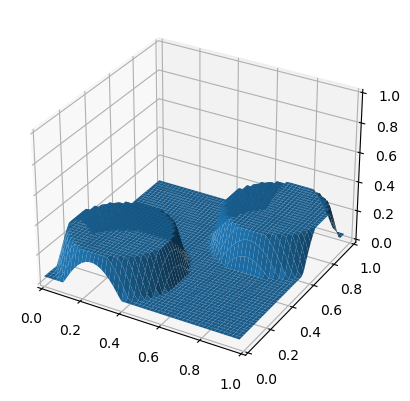

In [6]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

tepui_at = tepui(
        base=0.05,
        top=0.3,
        slope=5,
        vertex=1.5,
)

x = np.arange(0, 1, 0.02)
y = np.arange(0, 1, 0.02)

X, Y = np.meshgrid(x, y)
points = np.array([X,Y])

nu = np.apply_along_axis(tepui_at, 0, points)

fig = plt.figure()
ax:Axes = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0, right=1) 
ax.axes.set_ylim3d(bottom=0, top=1) 
ax.axes.set_zlim3d(bottom=0, top=1) 
ax.plot_surface(X, Y, nu)
plt.show()

In [10]:
import numpy as np
x = np.arange(16).reshape(-1,4)
shape = x.shape
# y = np.ones(shape=(4,4))
# np.linalg.norm(x-y )
np.ravel_multi_index(multi_index=([0,2],[2,3],[2,0]), dims=shape) 

ValueError: parameter multi_index must be a sequence of length 2

In [2]:
import numpy as np
np.where(np.sum(rects.east_neighbours, axis=1) == 0)[0]
# for rect_num in range(shape[0]):
#         if np.sum(upper_neighbours.T[rect_num]) == 0:

array([ 1,  2,  8, 10, 15], dtype=int64)

In [9]:
import numpy as np
from numpy.random._generator import Generator

def call_experiment(distribution, rng:Generator, **kwargs):
    return rng.__getattribute__(distribution)(**kwargs)
xmin, ymin, xmax, ymax = 0, 0, 1, 1
# [xmin, ymin], [xmax, ymax], size=(2, 2)
call_experiment('uniform', rects.rng, low=[0, 0], high=[1, 1], size=(2, 2))

array([[0.95186745, 0.26756241],
       [0.69207914, 0.72522422]])